In [1]:
from NNScratchLib.models.MultiClassModels import NeuralNetwork
from NNScratchLib.models.Layers import SequentialLayer

from NNScratchLib.functions import activation_functions
from NNScratchLib.functions import measure_functions
from NNScratchLib.functions import optimizers

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Red Neuronal Para Clasificar el Dataset de Iris

Definiremos una red neuronal de 4 entradas, con una capa oculta de 4 neuronas, y una capa de salida de 3 neuronas. La función de activación para la capa oculta será la sigmoide y para la de salida la función softmax. Como el backpropagation ya tiene en cuenta la función de activación en la última capa, no es necesario definirla su derivada.

### Definición de la red

In [2]:
nn = NeuralNetwork()
nn.set(SequentialLayer(4, 5, activation=activation_functions.sigmoid, 
                            activation_derivate=activation_functions.sigmoid_derivate))
nn.set(SequentialLayer(5, 3, activation=activation_functions.softmax,
                            activation_derivate=activation_functions.softmax_derivate))

### Dataset de Iris

Cargamos el dataset IRIS, y dividimos el conjunto de datos en en train y test.

In [3]:
iris = pd.read_csv('NNScratchLib/datasets/iris')
iris = shuffle(iris)

X = iris.iloc[:, 0:4].values
y = iris.iloc[:, 4].values

enc = OneHotEncoder()
y = enc.fit_transform(y.reshape(-1,1)).toarray()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Entrenamiento de la red

A continuación, entrenamos el modelo con el conjunto de entrenamiento, y mostramos la evolución del error en cada iteración. Utilizaremos el optimizador del descenso del gradiente clásico, con una tasa de aprendizaje de 0.01

In [5]:
print("accuracy before training: ", measure_functions.accuracy(y_test, [nn.feedfoward(x) for x in X_test]))
(acc, loss) = optimizers.gradient_descent(nn, X_train, y_train, measure_functions.accuracy, epochs=300, learning_rate=0.01)

accuracy before training:  0.4
epoch   0 - Loss 1.05985, Accuracy 0.08333
epoch  10 - Loss 0.62562, Accuracy 1.00000
epoch  20 - Loss 0.31099, Accuracy 1.00000
epoch  30 - Loss 0.15666, Accuracy 1.00000
epoch  40 - Loss 0.09857, Accuracy 1.00000
epoch  50 - Loss 0.07024, Accuracy 1.00000
epoch  60 - Loss 0.05364, Accuracy 1.00000
epoch  70 - Loss 0.04300, Accuracy 1.00000
epoch  80 - Loss 0.03573, Accuracy 1.00000
epoch  90 - Loss 0.03050, Accuracy 1.00000
epoch 100 - Loss 0.02658, Accuracy 1.00000
epoch 110 - Loss 0.02356, Accuracy 1.00000
epoch 120 - Loss 0.02116, Accuracy 1.00000
epoch 130 - Loss 0.01922, Accuracy 1.00000
epoch 140 - Loss 0.01763, Accuracy 1.00000
epoch 150 - Loss 0.01630, Accuracy 1.00000
epoch 160 - Loss 0.01518, Accuracy 1.00000
epoch 170 - Loss 0.01422, Accuracy 1.00000
epoch 180 - Loss 0.01340, Accuracy 1.00000
epoch 190 - Loss 0.01268, Accuracy 1.00000
epoch 200 - Loss 0.01206, Accuracy 1.00000
epoch 210 - Loss 0.01150, Accuracy 1.00000
epoch 220 - Loss 0.0110

In [6]:
Y_pred = [nn.feedfoward(x) for x in X_test]
print("Accuracy after training (on test): ", measure_functions.accuracy(y_test, Y_pred))

Accuracy after training (on test):  0.9333333333333333


Si representamos la matriz de confusión del modelo

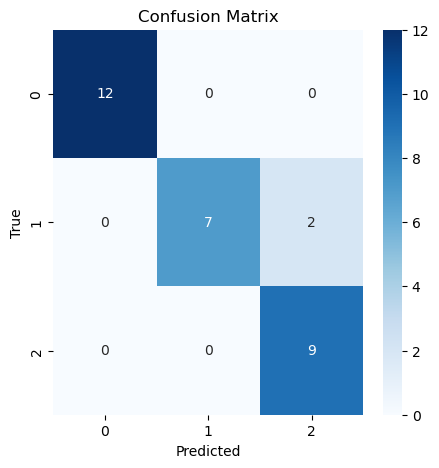

In [7]:
Y_pred = [np.argmax(nn.feedfoward(x)) for x in X_test]
Y_test = [np.argmax(y) for y in y_test]

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

A continuación, repetiremos el proceso para clasificar el mismo dataset, esta vez con un modelo de mayor complejidad, con 3 capas ocultas y una de salida, con el objetivo de probar la capacidad de generalización del backpropagation.

In [8]:
nn = NeuralNetwork()
nn.set(SequentialLayer(4, 20, activation=activation_functions.sigmoid, 
                            activation_derivate=activation_functions.sigmoid_derivate))
nn.set(SequentialLayer(20, 10, activation=activation_functions.sigmoid, 
                            activation_derivate=activation_functions.sigmoid_derivate))
nn.set(SequentialLayer(10, 6, activation=activation_functions.sigmoid, 
                            activation_derivate=activation_functions.sigmoid_derivate))
nn.set(SequentialLayer(6, 3, activation=activation_functions.softmax,
                            activation_derivate=activation_functions.softmax_derivate))

In [9]:
print("accuracy before training: ", measure_functions.accuracy(y_test, [nn.feedfoward(x) for x in X_test]))
(acc, loss) = optimizers.gradient_descent(nn, X_train, y_train, measure_functions.accuracy, epochs=300, learning_rate=0.01)

accuracy before training:  0.3
epoch   0 - Loss 1.40739, Accuracy 0.33333
epoch  10 - Loss 0.28881, Accuracy 0.62500
epoch  20 - Loss 0.09994, Accuracy 1.00000
epoch  30 - Loss 0.06260, Accuracy 1.00000
epoch  40 - Loss 0.06067, Accuracy 1.00000
epoch  50 - Loss 0.06915, Accuracy 1.00000
epoch  60 - Loss 0.07579, Accuracy 1.00000
epoch  70 - Loss 0.07731, Accuracy 1.00000
epoch  80 - Loss 0.07302, Accuracy 1.00000
epoch  90 - Loss 0.06557, Accuracy 1.00000
epoch 100 - Loss 0.05750, Accuracy 1.00000
epoch 110 - Loss 0.05005, Accuracy 1.00000
epoch 120 - Loss 0.04363, Accuracy 1.00000
epoch 130 - Loss 0.03824, Accuracy 1.00000
epoch 140 - Loss 0.03376, Accuracy 1.00000
epoch 150 - Loss 0.03003, Accuracy 1.00000
epoch 160 - Loss 0.02691, Accuracy 1.00000
epoch 170 - Loss 0.02425, Accuracy 1.00000
epoch 180 - Loss 0.02200, Accuracy 1.00000
epoch 190 - Loss 0.02012, Accuracy 1.00000
epoch 200 - Loss 0.01854, Accuracy 1.00000
epoch 210 - Loss 0.01722, Accuracy 1.00000
epoch 220 - Loss 0.0161

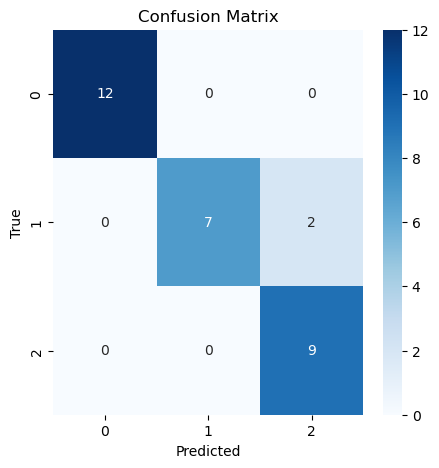

In [10]:
Y_pred = [np.argmax(nn.feedfoward(x)) for x in X_test]
Y_test = [np.argmax(y) for y in y_test]

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Red Neuronal Para Clasificar el Dataset de MNIST

### Definimos la red

Definimos ahora una red neuronal de 748 entradas, correspondiente con el tamaño de las imágenes del dataset MNIST una vez aplicado un flatten sobre ellas. La red dispondrá de una capa oculta de 10 neuronas, y una capa de salida de también 10 neuronas. La función de activación para la capa oculta será la ReLU, aunque para el paper se utilizó la función sigmoide, y para la de salida la función softmax.

In [11]:
nn = NeuralNetwork()
nn.set(SequentialLayer(784, 10, activation=activation_functions.ReLU,
                                activation_derivate=activation_functions.ReLU_derivate))
nn.set(SequentialLayer(10, 10, activation=activation_functions.softmax, 
                                activation_derivate=activation_functions.softmax_derivate))

### Dataset de MNIST

Cargamos el dataset haciendo uso de la libería Keras, y dividimos el conjunto de datos en en train y test.

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [13]:
x_train = x_train.reshape((-1, 28*28))
x_train = x_train.astype('float64')/255

x_test = x_test.reshape((-1, 28*28))
x_test = x_test.astype('float64')/255

y_train = enc.fit_transform(y_train.reshape(-1,1)).toarray()
y_test = enc.fit_transform(y_test.reshape(-1,1)).toarray()

print("accuracy before training: ", measure_functions.accuracy(y_test, [nn.feedfoward(x) for x in x_test]))

accuracy before training:  0.1077


### Entrenamiento de la red

In [14]:
print("accuracy before training: ", measure_functions.accuracy(y_test, [nn.feedfoward(x) for x in x_test]))
optimizers.Adam(nn, x_train, y_train, measure_functions.accuracy, epochs=80, learning_rate=0.001);

accuracy before training:  0.1077
epoch   0 - Loss 1.83296, Accuracy 0.41717
epoch  10 - Loss 0.06380, Accuracy 0.87542
epoch  20 - Loss 0.00303, Accuracy 0.90283
epoch  30 - Loss 0.00040, Accuracy 0.91575
epoch  40 - Loss 0.00011, Accuracy 0.92333
epoch  50 - Loss 0.00007, Accuracy 0.92625
epoch  60 - Loss 0.00004, Accuracy 0.92817
epoch  70 - Loss 0.00003, Accuracy 0.92875


In [17]:
Y_pred = [nn.feedfoward(x) for x in x_test]
print("Accuracy after training (on test): ", measure_functions.accuracy(y_test, Y_pred))

Accuracy after training (on test):  0.9283


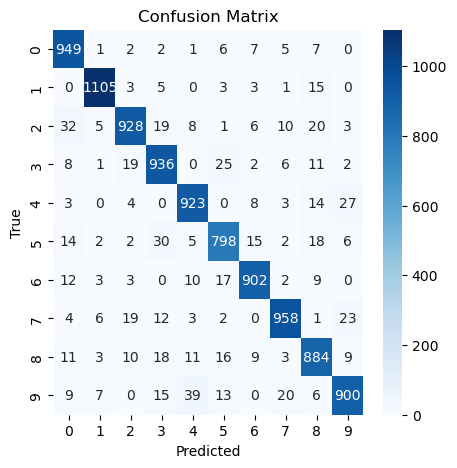

In [18]:
Y_pred = [np.argmax(nn.feedfoward(x)) for x in x_test]
Y_test = [np.argmax(y) for y in y_test]

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Autoencoder

In [ ]:
nn = NeuralNetwork()
nn.set(SequentialLayer(784, 128, activation=activation_functions.ReLU,
                                activation_derivate=activation_functions.ReLU_derivate))
nn.set(SequentialLayer(128, 10, activation=activation_functions.ReLU,
                                activation_derivate=activation_functions.ReLU_derivate))
nn.set(SequentialLayer(10, 128, activation=activation_functions.ReLU,
                                activation_derivate=activation_functions.ReLU_derivate))
nn.set(SequentialLayer(128, 784, activation=activation_functions.sigmoid,
                                activation_derivate=activation_functions.mse_derivate))

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((-1, 28*28))
x_train = x_train.astype('float64')/255

x_test = x_test.reshape((-1, 28*28))
x_test = x_test.astype('float64')/255


optimizers.Adam(nn, x_train, x_train, measure_functions.accuracy, epochs=80, learning_rate=0.0001);

In [ ]:
# imprimir imagem original
plt.imshow(x_test[1].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
# imprimir imagem reconstruída
plt.imshow(nn.feedfoward(x_test[1000]).reshape(28,28), cmap='gray')
plt.show()